# <span style='color:black'>Project 4</span>

In [ ]:
import csv
import sys
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
import yfinance as yfin

In [ ]:
start_date = '2017-01-01' # inclusive
end_date = '2019-12-31' # exclusive

asset_lst = ['A','AAP','AAPL','GOOG','GS','TSLA']

MyData = yfin.download(asset_lst,start=start_date,end=end_date)
MyData = MyData.dropna()
MyData_adj_close = MyData['Adj Close']
MyData_open = MyData['Open']

returns = (MyData_adj_close - MyData_open) / MyData_open
asset_lst = list(returns.columns)
returns_arr= returns.values
expected_returns = np.mean(returns_arr, axis=0)
print(expected_returns)

[*********************100%***********************]  6 of 6 completed

[-0.04543767 -0.09574559 -0.05068312 -0.00185801 -0.13472365  0.00099954]


### Plot asset prices over entire period for general frame of reference

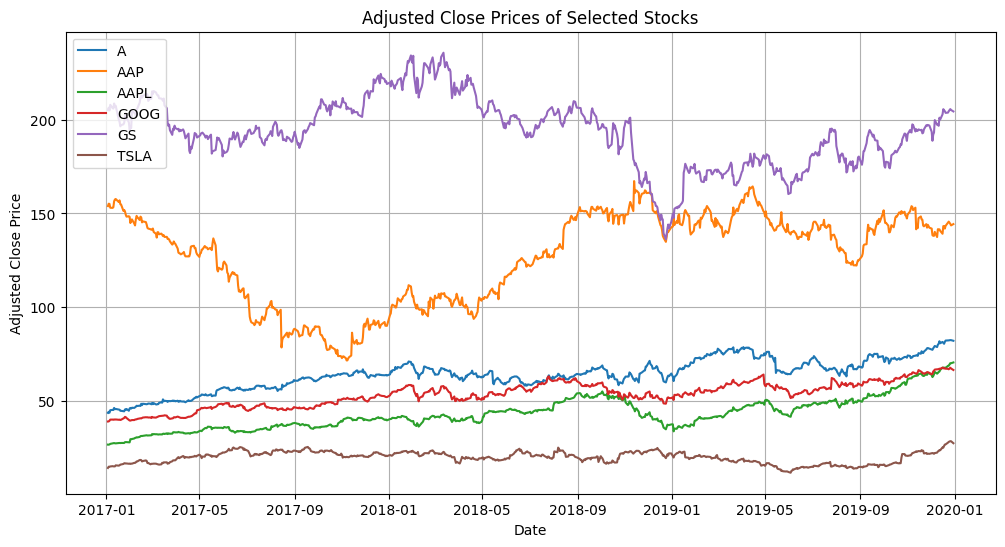

In [ ]:
plt.figure(figsize=(12, 6))
for asset in asset_lst:
    plt.plot(MyData_adj_close.index, MyData_adj_close[asset], label=asset)

# Add title and labels
plt.title("Adjusted Close Prices of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(loc="upper left")
plt.grid(True)

# Show the plot
plt.show()

# <span style='color:black'>Part 1</span>

In [ ]:
def objective(weights, returns_arr, theta, pi):
    T,n = np.shape(returns_arr)
    first_term = -np.dot(expected_returns, weights) # Negative expected return term
    excess_returns = returns_arr - expected_returns
    weighted_excess_returns = np.dot(excess_returns,weights)
    risk_term = (np.mean((weighted_excess_returns) ** pi))
    total_objective = first_term + theta * risk_term # Impact of risk term is scaled by theta
    return total_objective

def grad_func(theta, pi, x, returns_arr):
    T, n = returns_arr.shape
    grad = np.zeros(n) #initialize gradient vector
    excess_returns = returns_arr - expected_returns  # T x n matrix
    y = excess_returns @ x  # T x 1 matrix

    # Compute gradient for each asset
    for j in range(n):
        #Term 1: return term (-r_j)
        grad_first_term = -expected_returns[j]

        #Term 2: risk term (see derivation)
        risk_coefficient = (theta * pi) / T #coefficient
        grad_risk_term = np.sum((y ** (pi - 1)) * excess_returns[:, j]) #summation term (y_t^(pi-1)) * (r_j,t - r_j_bar) over all days

        #Combine terms
        grad[j] = grad_first_term + risk_coefficient * grad_risk_term

    return grad


def gradient_descent_1(x_init, theta, pi, returns_arr, alpha, tol, max_iter, beta):
    x_vals = [x_init]
    z_vals = [objective(x_init, returns_arr, theta, pi)]
    velocity = np.zeros(len(x_init)) #initialize momentum term
    x = np.array(x_init)
    z = z_vals[0]

    for i in range(max_iter):
        grad = grad_func(theta, pi, x, returns_arr)

        velocity = beta * velocity + (1 - beta) * grad #momentum term

        # Update step with clipping to ensure |x_j| ≤ 1 for all j
        x_new = np.clip(x - alpha * velocity, -1, 1)
        z_new = objective(x_new,returns_arr,theta,pi)
        x_vals.append(x_new)
        z_vals.append(z_new)

        # Check for convergence
        if np.abs(z_new - z) < tol:
            print(f"pi={pi}, theta={theta}: Convergence achieved in {i} iterations with objective value: {z_new}")
            return x_new,z_new, x_vals, z_vals
            break

        x = x_new
        z = z_new

    print(f"pi={pi}, theta={theta}: Did not converge in {max_iter} iterations with final objective value: {z_new}")
    return x, z, x_vals, z_vals


pi=2, theta=10: Convergence achieved in 4271 iterations with objective value: -0.30706860103496936
A: -1.0
AAP: -1.0
AAPL: -1.0
GOOG: 0.6753801050510425
GS: -1.0
TSLA: 0.4453664234209721


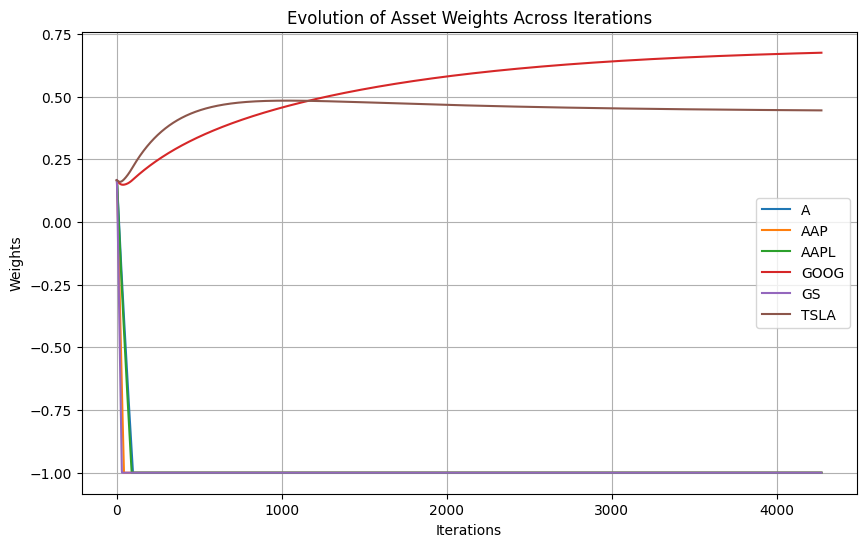

In [ ]:
theta = 10
pi = 2
# Gradient descent parameters
alpha = 0.3 #Learning rate
x_init = [1/6,1/6,1/6,1/6,1/6,1/6]  # Initial weights
max_iter = 10000  # Maximum number of iterations
tolerance = 1e-9
beta = 0.5
weights, z, x_vals, z_vals = gradient_descent_1(x_init, theta, pi, returns_arr, alpha, tolerance, max_iter, beta)

for i, asset in enumerate(asset_lst):
    print(f'{asset}: {weights[i]}')

x_vals = np.array(x_vals)
iterations = np.arange(x_vals.shape[0])  # Number of iterations
plt.figure(figsize=(10, 6))
for i, asset in enumerate(asset_lst):
    plt.plot(iterations, x_vals[:, i], label=asset)

plt.title('Evolution of Asset Weights Across Iterations')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.legend()
plt.grid(True)
plt.show()


### Run for different pi and theta and plot results

pi=2, theta=0: Convergence achieved in 4170 iterations with objective value: -0.3294475912211546
pi=2, theta=10: Convergence achieved in 5974 iterations with objective value: -0.307068246103557
pi=2, theta=100: Convergence achieved in 1771 iterations with objective value: -0.1825994851459879
pi=2, theta=1000: Convergence achieved in 267 iterations with objective value: -0.031756654859929824
pi=2, theta=10000: Convergence achieved in 30 iterations with objective value: -0.0031756665650499913


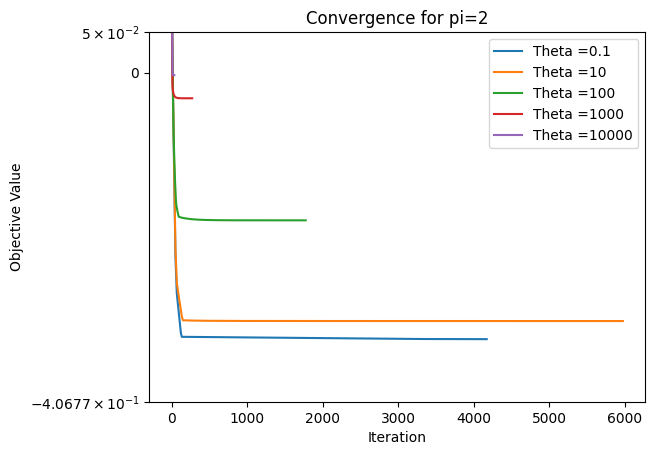

pi=4, theta=10000: Convergence achieved in 809 iterations with objective value: -0.2544917278151735
pi=4, theta=50000: Convergence achieved in 1054 iterations with objective value: -0.18871058980308492
pi=4, theta=100000: Convergence achieved in 782 iterations with objective value: -0.1605184771644034
pi=4, theta=500000: Convergence achieved in 447 iterations with objective value: -0.09999871098500922
pi=4, theta=1000000: Convergence achieved in 356 iterations with objective value: -0.07936903063827497


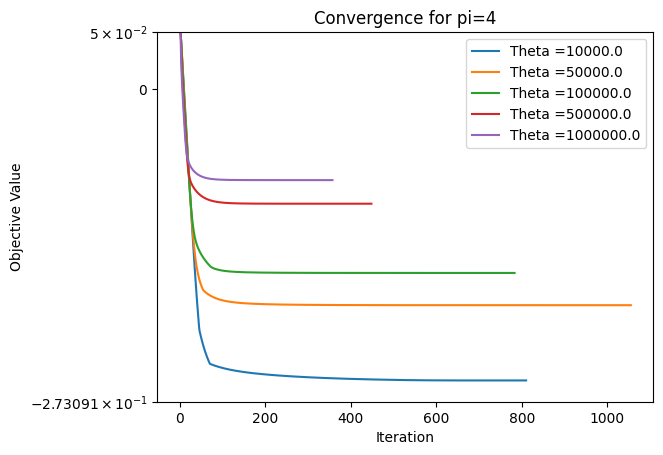

pi=6, theta=1000000: Convergence achieved in 685 iterations with objective value: -0.2752061151910974
pi=6, theta=5000000: Convergence achieved in 1320 iterations with objective value: -0.2311850103617268
pi=6, theta=10000000: Convergence achieved in 1060 iterations with objective value: -0.21085890192810963
pi=6, theta=50000000: Convergence achieved in 642 iterations with objective value: -0.16775857902581925
pi=6, theta=100000000: Convergence achieved in 509 iterations with objective value: -0.14944276782008786


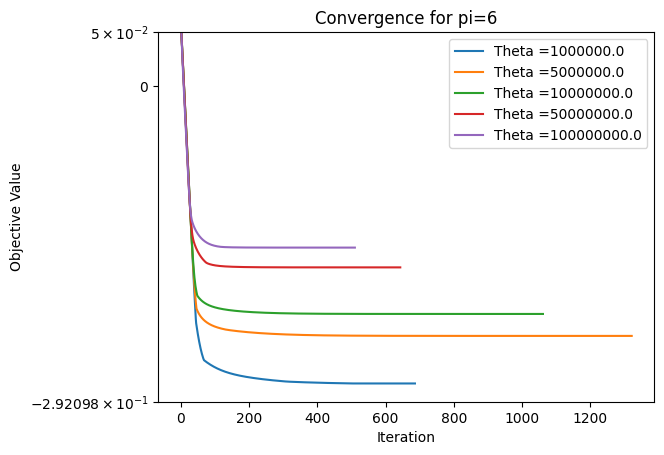

In [ ]:
pi_theta_pairs = [[2, [.1, 10, 100, 1000, 10000]], [4, [1e4,  5 * 1e4, 1e5,  5 * 1e5, 1e6]], [6, [1e6,  5 * 1e6, 1e7,  5 * 1e7, 1e8]]]
alpha = 0.2
x_init = [1/6] * 6
max_iter = 10000
tolerance = 1e-9
beta = 0.5

# Store results
task1_results = {pi: [] for [pi, _] in pi_theta_pairs}

# Run gradient descent for each pi and theta
for pi, thetas in pi_theta_pairs:
    for theta in thetas:
        x, z, x_vals, z_vals = gradient_descent_1(x_init, int(theta), pi, returns_arr, alpha, tolerance, max_iter, beta)
        plt.plot(z_vals,label=f"Theta ={theta}")
        task1_results[pi].append(z)  # Store final objective value

    plt.title(f"Convergence for pi={pi}")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.yscale("symlog")
    plt.legend()
    plt.ylim(ymax = 0.05)
    plt.show()

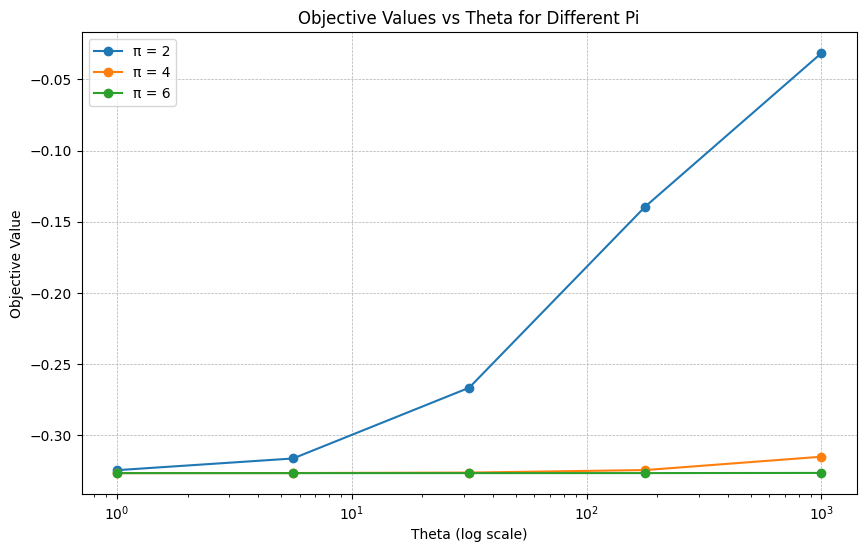

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
for pi, obj_values in task1_results.items():
    plt.plot(thetas, obj_values, marker='o', label=f"π = {pi}")

plt.xscale("log")
plt.xlabel("Theta (log scale)")
plt.ylabel("Objective Value")
plt.title("Objective Values vs Theta for Different Pi")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# <span style='color:red'>Part 2</span>

## Gradient Descent with Simplex Projection




In [ ]:
def simplex_projection(x):
    n = len(x)
    sorted_x = np.sort(x)[::-1]
    cumulative_sum = np.cumsum(sorted_x) #calculate the cumulative sum of sorted weights
    rho = np.max(np.where(sorted_x > (cumulative_sum - 1) / np.arange(1, n + 1)))
    threshold = (cumulative_sum[rho] - 1) / (rho + 1)
    return np.maximum(x - threshold, 0) #subtracts threshold and sets negative values to 0 to maintain nonnegativity constraint

def gradient_descent_2(x_init, theta, pi, returns_arr, alpha=0.01, tol=1e-6, max_iter=100, beta = 0):
    x_vals = [x_init]
    z_vals = [objective(x_init, returns_arr, theta, pi)]
    velocity = np.ones(len(x_init))
    x = np.array(x_init)
    z = z_vals[0]
    for i in range(max_iter):
        grad = grad_func(theta, pi, x, returns_arr) #REUSING GRADIENT FUNCTION FROM TASK 1
        obj_val = objective(x, returns_arr, theta, pi) #REUSING OBJECTIVE FUNCTION FROM TASK 1

        velocity = beta * velocity + (1 - beta) * grad #momentum term

        #Update and project back to valid vector space using simplex projection algorithm (see project writeup)
        x_new = simplex_projection(x - alpha * velocity)
        z_new = objective(x_new,returns_arr,theta,pi)
        x_vals.append(x_new)
        z_vals.append(z_new)

        # Check for convergence
        if np.abs(z_new - z) < tol:
            print(f"pi={pi}, theta={theta}: Convergence achieved in {i} iterations with objective value: {z_new}")
            return x_new,z_new, x_vals, z_vals
            break

        x = x_new
        z = z_new

    print(f"pi={pi}, theta={theta}: Did not converge in {max_iter} iterations with final objective value: {z_new}")
    return x, z, x_vals, z_vals

pi=2, theta=10: Convergence achieved in 2729 iterations with objective value: 0.0026678134636667246
A: 0.0
AAP: 0.0
AAPL: 0.0
GOOG: 0.6393831351791134
GS: 0.0
TSLA: 0.3606168648208866


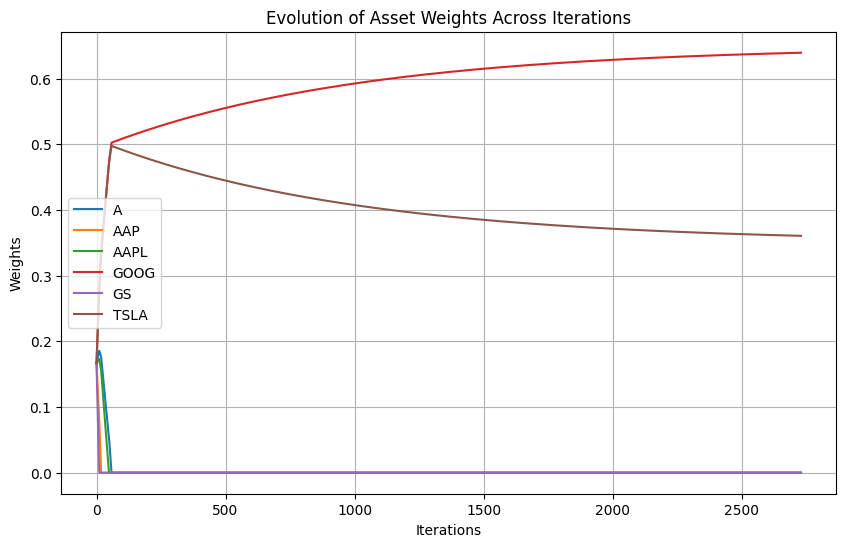

In [ ]:
theta = 10
pi = 2
# Gradient descent parameters
alpha = 0.2 #0.5  # Learning rate, 0.5 is too big!
x_init = [1/6,1/6,1/6,1/6,1/6,1/6]  # Initial weights
max_iter = 10000 # Maximum number of iterations
tolerance = 1e-9
beta = 0.5
weights, z, x_vals, z_vals = gradient_descent_2(x_init, theta, pi, returns_arr, alpha, tolerance, max_iter)

for i, asset in enumerate(asset_lst):
    print(f'{asset}: {weights[i]}')


x_vals = np.array(x_vals)
iterations = np.arange(x_vals.shape[0])  # Number of iterations
plt.figure(figsize=(10, 6))
for i, asset in enumerate(asset_lst):
    plt.plot(iterations, x_vals[:, i], label=asset)

plt.title('Evolution of Asset Weights Across Iterations')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.legend()
plt.grid(True)
plt.show()

pi=2, theta=0: Convergence achieved in 1751 iterations with objective value: -0.0009995403652486511
pi=2, theta=10: Convergence achieved in 2729 iterations with objective value: 0.002667813447902168
pi=2, theta=100: Convergence achieved in 613 iterations with objective value: 0.01569353781243237
pi=2, theta=1000: Convergence achieved in 171 iterations with objective value: 0.12239278908595917
pi=2, theta=10000: Convergence achieved in 24 iterations with objective value: 0.9383110484176741


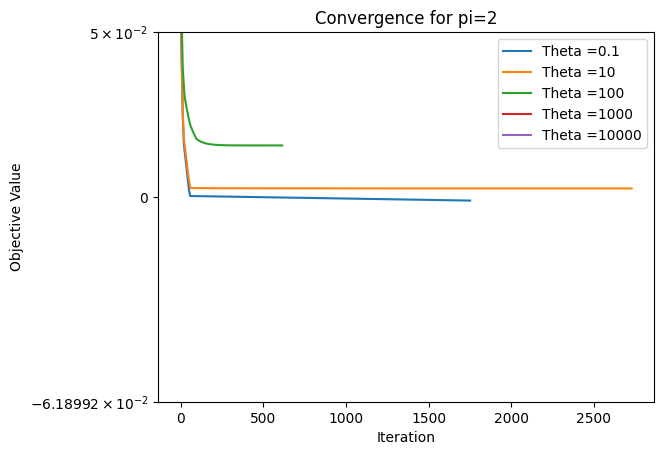

pi=4, theta=10000: Convergence achieved in 1734 iterations with objective value: 0.0027012465734919484
pi=4, theta=50000: Convergence achieved in 717 iterations with objective value: 0.008015189074448875
pi=4, theta=100000: Convergence achieved in 458 iterations with objective value: 0.014439523556970793
pi=4, theta=500000: Convergence achieved in 365 iterations with objective value: 0.05305840788062956
pi=4, theta=1000000: Convergence achieved in 153 iterations with objective value: 0.07930526595848819


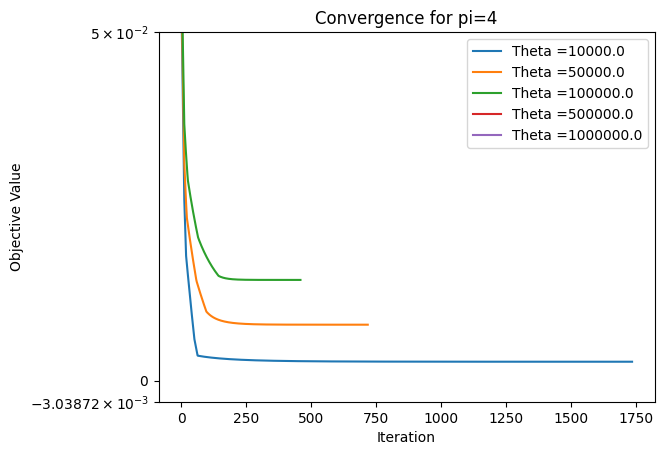

pi=6, theta=1000000: Convergence achieved in 1556 iterations with objective value: 0.001380804613229386
pi=6, theta=5000000: Convergence achieved in 1265 iterations with objective value: 0.002737164345295219
pi=6, theta=10000000: Convergence achieved in 915 iterations with objective value: 0.004028561086521669
pi=6, theta=50000000: Convergence achieved in 373 iterations with objective value: 0.013801026142992806
pi=6, theta=100000000: Convergence achieved in 485 iterations with objective value: 0.024582234079415975


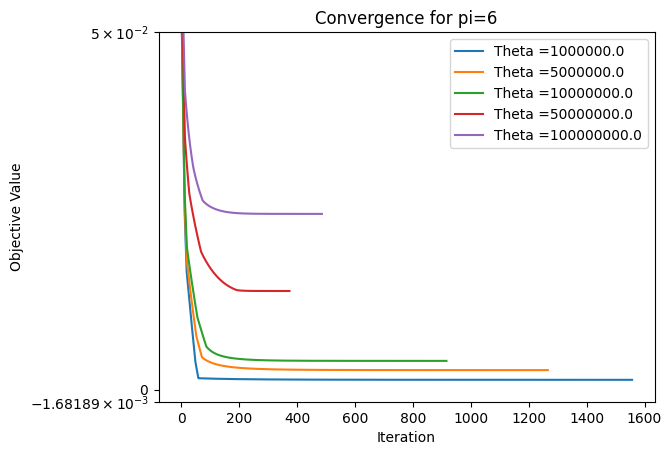

In [ ]:
pi_theta_pairs = [[2, [.1, 10, 100, 1000, 10000]], [4, [1e4,  5 * 1e4, 1e5,  5 * 1e5, 1e6]], [6, [1e6,  5 * 1e6, 1e7,  5 * 1e7, 1e8]]]
alpha = 0.2
x_init = [1/6] * 6
max_iter = 10000
tolerance = 1e-9
beta = 0.5

# Store results
task1_results = {pi: [] for [pi, _] in pi_theta_pairs}

# Run gradient descent with simplex projection for each pi and theta
for pi, thetas in pi_theta_pairs:
    for theta in thetas:
        x, z, x_vals, z_vals = gradient_descent_2(x_init, int(theta), pi, returns_arr, alpha, tolerance, max_iter, beta)
        plt.plot(z_vals,label=f"Theta ={theta}")
        task1_results[pi].append(z)  # Store final objective value

    plt.title(f"Convergence for pi={pi}")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.yscale("symlog")
    plt.legend()
    plt.ylim(ymax = 0.05)
    plt.show()